In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
import scipy as sp

def reduce(x, col_name):
  x[col_name] = x[col_name] / x[col_name].max()

def remove_outliers(df, times):
  for _ in range(times):
    df = df[(np.abs(zscore(df)) < 3).all(axis=1)]
  return df

* Pas de label -> None supervisé
* Colonne non nommée
* Pas de data description

In [22]:
df = pd.read_csv('../data/anomalies/creditcardfraud/creditcard.csv')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 result

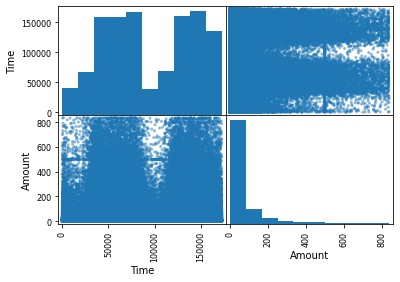

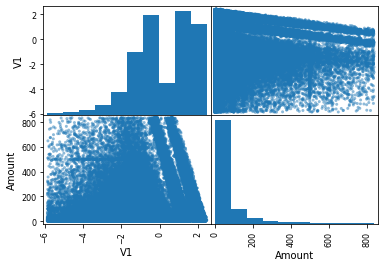

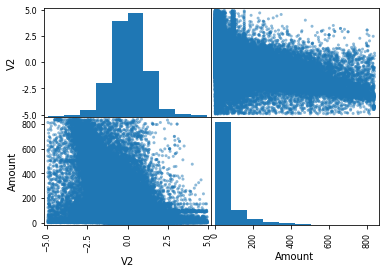

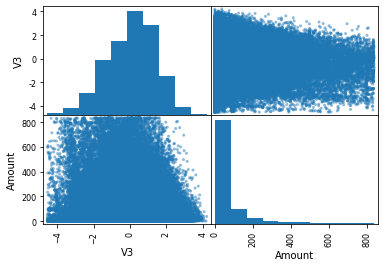

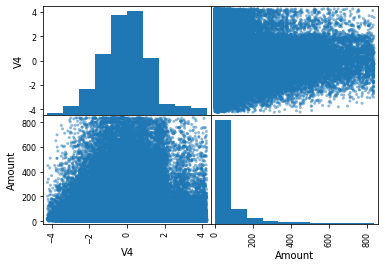

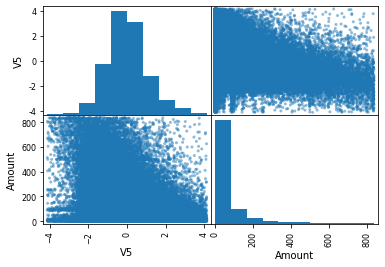

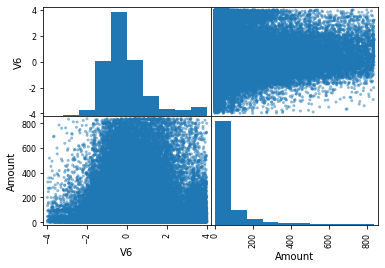

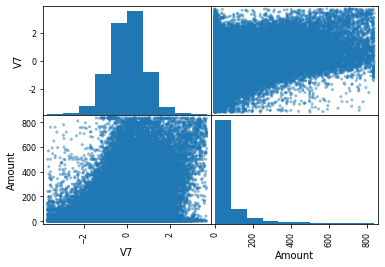

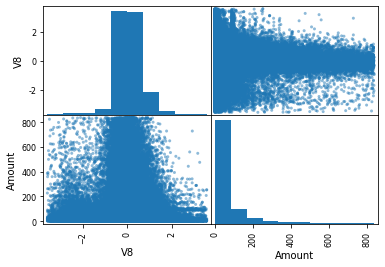

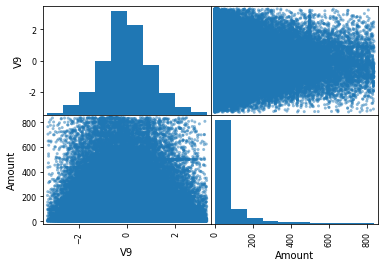

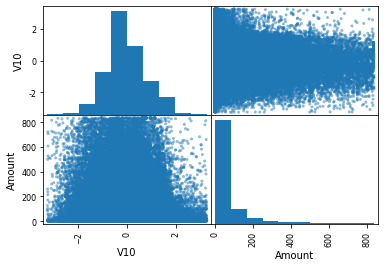

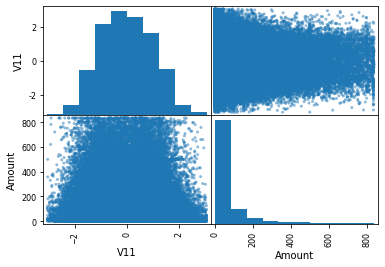

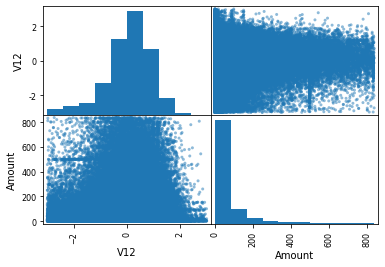

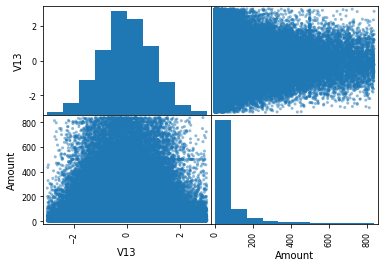

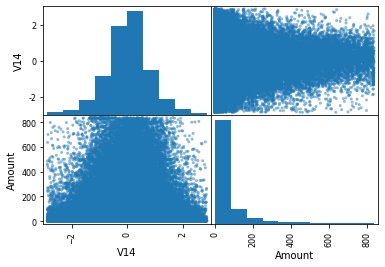

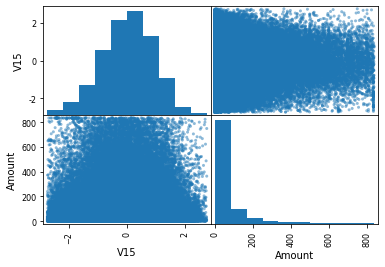

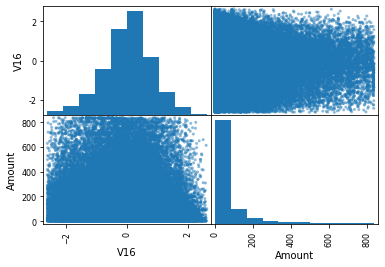

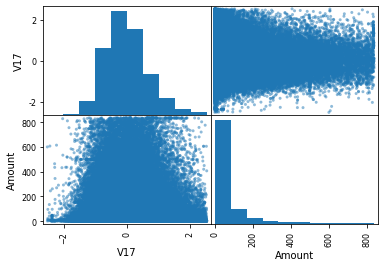

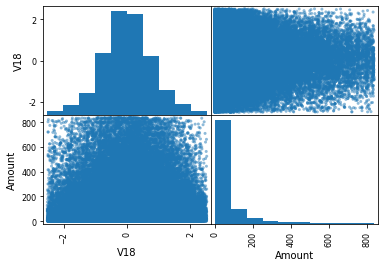

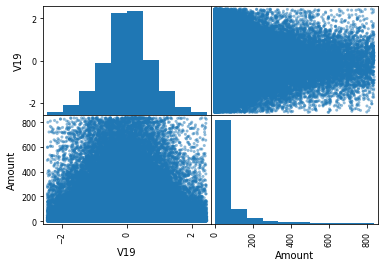

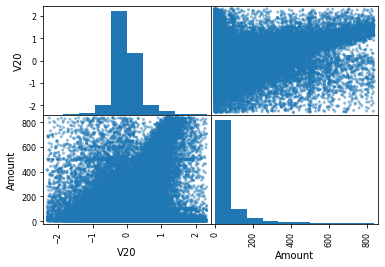

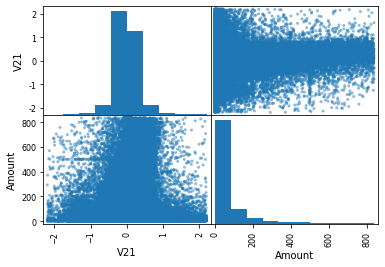

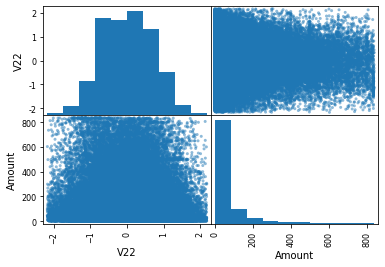

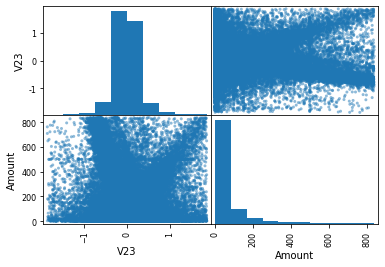

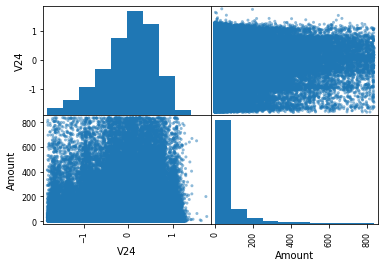

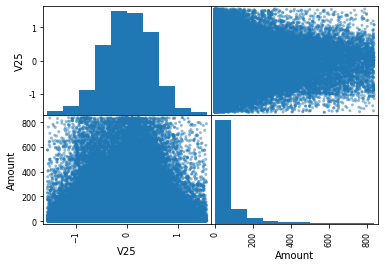

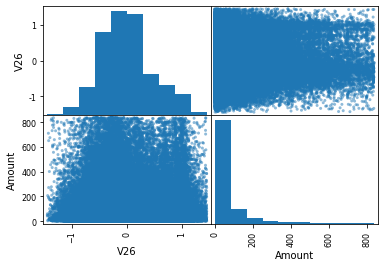

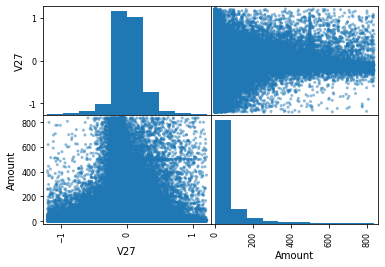

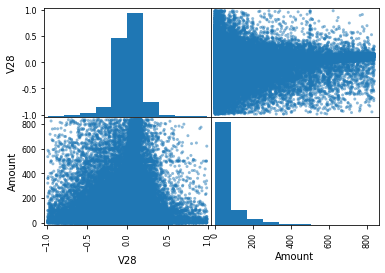

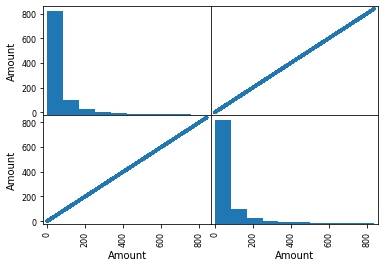

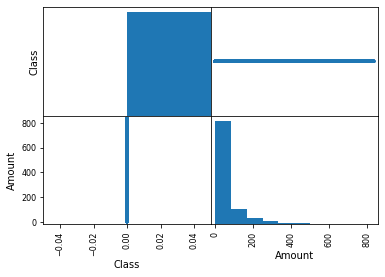

In [9]:
for col in df.columns:
  df_scatter = df[[col, 'Amount']]
  df_scatter = remove_outliers(df_scatter)
  a=scatter_matrix(df_scatter, alpha=0.5)

<AxesSubplot:>

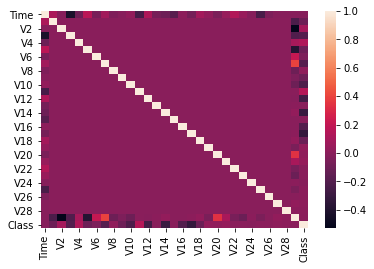

In [10]:
sns.heatmap(df.corr())

In [5]:
df_train, df_test = train_test_split(df, test_size=0.5, shuffle=True)
df_test, df_validation = train_test_split(df_test, test_size=0.5, shuffle=True)

In [25]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

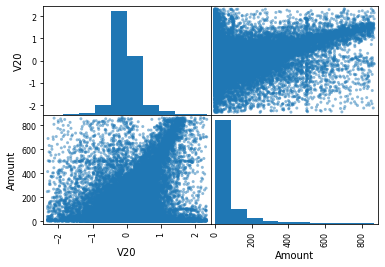

In [35]:
a=scatter_matrix(remove_outliers(df_train[['V20', 'Amount']]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


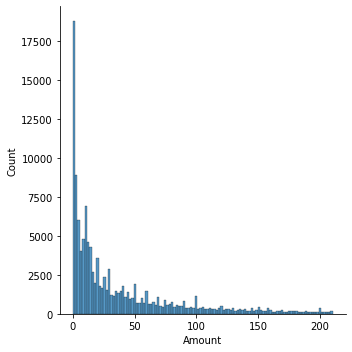

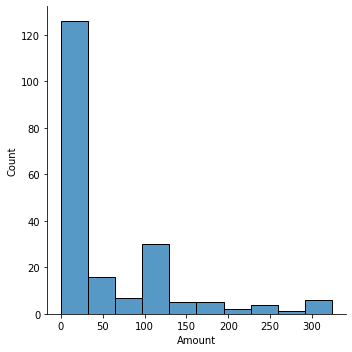

In [50]:
sns.displot(remove_outliers(df_train[['Amount', 'V20']][df['Class']== 0], 4), x='Amount')
sns.displot(remove_outliers(df_train[['Amount', 'V20']][df['Class']== 1], 4), x='Amount')

In [48]:
df_train.loc[df_train['Class'] == 0]['Class'].value_counts()

0    142160
Name: Class, dtype: int64

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
v_feature = df.ix[:,29].columns

plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_feature]):
  ax = plt.sublpot(gs[i])

In [ ]:
for col in df_train.columns:
  x = 'Amount'
  if col == x:continue
  y = col
  df_plot = df_train[[x, y, 'Class']]
  # df_plot = remove_outliers(df_plot, 1)
  sns.displot(df_plot, x=x, y=y, hue='Class')

In [24]:
model = RandomForestClassifier()
model.fit(df_train)


TypeError: fit() missing 1 required positional argument: 'y'

In [18]:
model.predict(df_train.loc[0].values.reshape(1, df_train.loc[8].values.shape[0]))

array([0])

In [16]:
df_train.loc[0].values.reshape(1, df_train.loc[0].values.shape[0])

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02,
         0.00000000e+00]])